# Produire une étude de marché

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Nettoyage des jeux de données

In [2]:
#Import des fichiers csv extraits directement de la base de données du site de la FAO

dispo_ali = pd.read_csv(r"C:\Users\Flavio\Desktop\P9\fichiers\dispo_alimentaire.csv")
pop_00_18 = pd.read_csv(r"C:\Users\Flavio\Desktop\P9\fichiers\Population_2000_2018.csv")
eco_data = pd.read_csv(r"C:\Users\Flavio\Desktop\P9\fichiers\eco_data_6-2-2022.csv")
political = pd.read_csv(r"C:\Users\Flavio\Desktop\P9\fichiers\PoliticalStability.csv")


In [3]:
#Recherche d'éventuelles valeurs en doublon avec la fonction .duplicated()
print('Valeurs en doublon sur les données extraites du fichier political : ' + str(political.duplicated().sum()))
print('Valeurs en doublon sur les données extraites du fichier eco_data : ' + str( eco_data.duplicated().sum()))
print('Valeurs en doublon sur les données extraites du fichier pop_00_18 : ' + str(pop_00_18.duplicated().sum()))
print('Valeurs en doublon sur les données extraites du fichier dispo_ali : ' + str(dispo_ali.duplicated().sum()))

Valeurs en doublon sur les données extraites du fichier political : 0
Valeurs en doublon sur les données extraites du fichier eco_data : 0
Valeurs en doublon sur les données extraites du fichier pop_00_18 : 0
Valeurs en doublon sur les données extraites du fichier dispo_ali : 0


In [4]:
#Recherche d'éventuelles valeurs manquantes avec la fonction .isna()

print('Valeurs manquantes sur les données extraites du fichier political : ' + str(political.isna().any().sum()))
print('Valeurs manquantes sur les données extraites du fichier eco_data: ' + str( eco_data.isna().any().sum()))
print('Valeurs manquantes sur les données extraites du fichier pop_00_18 : ' + str(pop_00_18.isna().any().sum()))
print('Valeurs manquantes sur les données extraites du fichier dispo_ali : ' + str(dispo_ali.isna().any().sum()))

Valeurs manquantes sur les données extraites du fichier political : 0
Valeurs manquantes sur les données extraites du fichier eco_data: 1
Valeurs manquantes sur les données extraites du fichier pop_00_18 : 1
Valeurs manquantes sur les données extraites du fichier dispo_ali : 15


In [5]:
political.shape

(3526, 4)

In [6]:
# eco_1 = eco_data.loc[:, 'Élément'] == 'Valeur US $ par habitant'
# eco_2 = eco_data.loc[eco_1]
# eco_2.head()

In [7]:
#Création du DF (politica_1) avec la Valeur political
politica_1 =political.loc[(political['Year'] == 2017)]


In [8]:
#Application d'une fonction .drop() pour supprimer les variables inutiles à l'analyse
politica_1.drop(['Granularity','Year'],  axis=1, inplace=True)
politica_1.shape

(198, 2)

In [9]:
# Renommer les colonnes data
# politica_1= politica_1.rename(columns = {'Political_Stability':'Année'})
# #Application d'une fonction .drop() pour supprimer les variables inutiles à l'analyse
# politica_1.drop(['Country','Year'],  axis=1, inplace=True)
# politica_1.head()

In [10]:

#vérifier les NaN
# total_nan_values = politica_1.isnull().sum().sum()
# print (total_nan_values)

In [11]:
eco_data.shape

(2528, 10)

In [12]:
#Création du DF (eco_2) avec la Valeur us para habitant

eco_1 = eco_data.loc[:, 'Élément'] == 'Valeur US $ par habitant'
eco_2 = eco_data.loc[eco_1]
eco_2.head()

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur,Symbole,Description du Symbole,Note
2,Indicateurs macro,Afghanistan,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,520.616409,X,Sources internationales sûres,NaN
14,Indicateurs macro,Afrique du Sud,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,6121.876572,X,Sources internationales sûres,NaN
26,Indicateurs macro,Albanie,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,4514.204908,X,Sources internationales sûres,NaN
38,Indicateurs macro,Algérie,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,4109.696001,X,Sources internationales sûres,NaN
50,Indicateurs macro,Allemagne,Valeur US $ par habitant,Produit Intérieur Brut,2017,US$,44651.829102,X,Sources internationales sûres,NaN


In [13]:
eco_2.shape

(211, 10)

In [14]:
#Application d'une fonction .drop() pour supprimer les variables inutiles à l'analyse
eco_2.drop(['Domaine', 'Symbole', 'Élément', 'Description du Symbole', 'Produit', 'Unité', 'Note'],  axis=1, inplace=True)
eco_2.head()

,Zone,Année,Valeur
2,Afghanistan,2017,520.616409
14,Afrique du Sud,2017,6121.876572
26,Albanie,2017,4514.204908
38,Algérie,2017,4109.696001
50,Allemagne,2017,44651.829102


In [15]:
pop_00_18.shape

(4411, 15)

In [16]:
#Création du DF (politica_1) avec la Valeur political
pop_1 =pop_00_18.loc[(pop_00_18['Année'] == 2017)]
pop_1

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,OA,Séries temporelles annuelles,236,Venezuela (République bolivarienne du),511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,29402.484,X,Sources internationales sûres,NaN
4352,OA,Séries temporelles annuelles,237,Viet Nam,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,94600.648,X,Sources internationales sûres,NaN
4371,OA,Séries temporelles annuelles,249,Yémen,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,27834.819,X,Sources internationales sûres,NaN
4390,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,16853.599,X,Sources internationales sûres,NaN


In [17]:
#Application d'une fonction .drop() pour supprimer les variables inutiles à l'analyse
pop_1.drop(['Code Domaine', 'Domaine', 'Code zone', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Symbole', 'Unité', 'Description du Symbole', 'Note'],  axis=1, inplace=True)


In [18]:
# Renommer les colonnes de pop_00_18
pop_1= pop_1.rename(columns = {'Valeur':'Population'})
pop_1.shape

(236, 3)

In [19]:
dispo_ali.shape

(15605, 18)

In [20]:
#Création du DF (importation_volailles) avec la variable Viande de Volailles
Viande = dispo_ali.loc[:, 'Produit'] == 'Viande de Volailles'
volailles = dispo_ali.loc[Viande]


In [21]:
#Application d'une fonction .drop() pour supprimer les variables inutiles à l'analyse dans dispo_ali

volailles.drop(['Produit', 'Origine', 'Aliments pour animaux', 'Autres Utilisations', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)','Nourriture','Pertes', 'Semences', 'Traitement', 'Variation de stock'],  axis=1, inplace=True)
volailles.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
56,Afghanistan,9.0,75.0,NaN,48.0,26.0
151,Afrique du Sud,151.0,1983.0,54.0,356.0,1679.0
243,Albanie,67.0,42.0,0.0,25.0,17.0
336,Algérie,26.0,291.0,0.0,3.0,288.0
431,Allemagne,65.0,1569.0,676.0,788.0,1457.0


In [22]:
volailles.shape

(174, 6)

In [23]:
# Liste des pays du monde classés selon la valeur de leur produit intérieur brut (PIB) 

eco_2.sort_values('Valeur', ascending=False).head()

,Zone,Année,Valeur
1330,Liechtenstein,2017,171278.066389
1510,Monaco,2017,167516.046763
290,Bermudes,2017,113281.987026
1354,Luxembourg,2017,111017.182246
2266,Suisse,2017,83313.013992


In [24]:
# Liste des pays les plus stables

politica_1.sort_values('Political_Stability', ascending=False).head()

,Country,Political_Stability
1321,Greenland,1.92
2872,Singapore,1.62
2262,New Zealand,1.59
697,"China, Macao SAR",1.43
85,Andorra,1.42


In [25]:
#Liste de pays ayant la plus forte importations de volailles

volailles['volailles']=volailles['Importations - Quantité']-volailles['Production']
volailles[["Zone", "volailles"]].sort_values('volailles',ascending=False).head()

,Zone,volailles
3084,Chine - RAS de Hong-Kong,1158.0
15241,Émirats arabes unis,330.0
6553,Iraq,325.0
511,Angola,312.0
696,Arabie saoudite,310.0


In [26]:
#Liste de pays ayant la plus forte proportion consommation de poulet

top_10=volailles[["Zone", "Disponibilité alimentaire (Kcal/personne/jour)"]].sort_values("Disponibilité alimentaire (Kcal/personne/jour)",ascending=False)[:10]
top_10

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
12467,Sainte-Lucie,293.0
602,Antigua-et-Barbuda,251.0
12380,Saint-Vincent-et-les Grenadines,244.0
6829,Israël,217.0
2074,Brunéi Darussalam,214.0
12543,Samoa,213.0
14092,Trinité-et-Tobago,201.0
3084,Chine - RAS de Hong-Kong,197.0
15431,États-Unis d'Amérique,197.0
2170,Brésil,192.0


In [27]:
# Liste des pays les plus peuplés

pop_1.sort_values('Population', ascending=False).head()

,Zone,Année,Population
823,"Chine, continentale",2017,1421021.791
1952,Inde,2017,1338676.785
1230,États-Unis d'Amérique,2017,325084.756
1971,Indonésie,2017,264650.963
3029,Pakistan,2017,207906.209


In [28]:
politica_1.columns

Index(['Country', 'Political_Stability'], dtype='object')

In [29]:
politica_1.dropna(subset=['Country'], inplace = True)

In [30]:
politica_1.shape

(198, 2)

In [31]:
volailles.columns

Index(['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Production', 'volailles'],
      dtype='object')

In [32]:
#Application d'une fonction .drop() pour supprimer les variables inutiles à l'analyse
volailles.drop(['Disponibilité alimentaire (Kcal/personne/jour)','Exportations - Quantité'],  axis=1, inplace=True)


In [33]:
volailles.dropna(subset=['Zone'], inplace = True)

In [34]:
volailles.shape

(174, 5)

In [35]:
eco_2.columns

Index(['Zone', 'Année', 'Valeur'], dtype='object')

In [36]:
eco_2.shape

(211, 3)

In [37]:
eco_2.dropna(subset=['Zone','Année'], inplace = True)

In [38]:
pop_1.shape

(236, 3)

In [39]:
pop_1.columns

Index(['Zone', 'Année', 'Population'], dtype='object')

In [40]:
# data = eco_2.merge(politica_1, left_on='Zone', right_on='Country').merge(volailles, on='Zone').merge(pop_1, on='Zone')


In [41]:
data3 = eco_2.merge(volailles, left_on='Zone', right_on='Zone').merge(pop_1, on='Zone')
# .set_index('Zone')


In [42]:
#Application d'une fonction .drop() pour supprimer les variables inutiles à l'analyse
data3.drop(['Année_x','Année_y'],  axis=1, inplace=True)
# # # Renommer les colonnes
data3= data3.rename(columns = {'Valeur':'PIB', 'Valeur_y':'population','Importations - Quantité':'Importations'})

In [43]:
data3

,Zone,PIB,Disponibilité intérieure,Importations,Production,volailles,Population
0,Afghanistan,520.616409,75.0,48.0,26.0,22.0,36296.113
1,Afrique du Sud,6121.876572,1983.0,356.0,1679.0,-1323.0,57009.756
2,Albanie,4514.204908,42.0,25.0,17.0,8.0,2884.169
3,Algérie,4109.696001,291.0,3.0,288.0,-285.0,41389.189
4,Allemagne,44651.829102,1569.0,788.0,1457.0,-669.0,82658.409
...,...,...,...,...,...,...,...
166,Venezuela (République bolivarienne du),8432.288335,1194.0,279.0,915.0,-636.0,29402.484
167,Viet Nam,2365.521494,1133.0,500.0,633.0,-133.0,94600.648
168,Yémen,745.087677,262.0,109.0,153.0,-44.0,27834.819
169,Zambie,1534.874627,48.0,2.0,46.0,-44.0,16853.599


In [44]:
# # # Renommer les colonnes
politica_1= politica_1.rename(columns = {'Country':'Zone'})
politica_1

,Zone,Political_Stability
16,Afghanistan,-2.80
34,Albania,0.38
52,Algeria,-0.92
67,American Samoa,1.22
85,Andorra,1.42
...,...,...
3452,Venezuela (Bolivarian Republic of),-1.25
3470,Viet Nam,0.29
3488,Yemen,-2.94
3506,Zambia,0.15


In [45]:
data2=pd.merge(data3, politica_1, on = 'Zone', how='left')

In [46]:
data2

,Zone,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Political_Stability
0,Afghanistan,520.616409,75.0,48.0,26.0,22.0,36296.113,-2.80
1,Afrique du Sud,6121.876572,1983.0,356.0,1679.0,-1323.0,57009.756,NaN
2,Albanie,4514.204908,42.0,25.0,17.0,8.0,2884.169,NaN
3,Algérie,4109.696001,291.0,3.0,288.0,-285.0,41389.189,NaN
4,Allemagne,44651.829102,1569.0,788.0,1457.0,-669.0,82658.409,NaN
...,...,...,...,...,...,...,...,...
166,Venezuela (République bolivarienne du),8432.288335,1194.0,279.0,915.0,-636.0,29402.484,NaN
167,Viet Nam,2365.521494,1133.0,500.0,633.0,-133.0,94600.648,0.29
168,Yémen,745.087677,262.0,109.0,153.0,-44.0,27834.819,NaN
169,Zambie,1534.874627,48.0,2.0,46.0,-44.0,16853.599,NaN


In [47]:

#Application d'une fonction .drop() pour supprimer les variables inutiles à l'analyse
# data.drop(['Country','Year'],  axis=1, inplace=True)
# Renommer les colonnes
data1= data2.rename(columns = {'Political_Stability':'Stabilité politique', 'Zone':'Pays'}).set_index('Pays')
data1.shape

(171, 7)

In [112]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PIB                       171 non-null    float64
 1   Disponibilité intérieure  171 non-null    float64
 2   Importations              170 non-null    float64
 3   Production                169 non-null    float64
 4   volailles                 168 non-null    float64
 5   Population                171 non-null    float64
 6   Stabilité politique       54 non-null     float64
dtypes: float64(7)
memory usage: 10.7+ KB


In [48]:
data1

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique
Pays,,,,,,,
Afghanistan,520.616409,75.0,48.0,26.0,22.0,36296.113,-2.80
Afrique du Sud,6121.876572,1983.0,356.0,1679.0,-1323.0,57009.756,NaN
Albanie,4514.204908,42.0,25.0,17.0,8.0,2884.169,NaN
Algérie,4109.696001,291.0,3.0,288.0,-285.0,41389.189,NaN
Allemagne,44651.829102,1569.0,788.0,1457.0,-669.0,82658.409,NaN
...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),8432.288335,1194.0,279.0,915.0,-636.0,29402.484,NaN
Viet Nam,2365.521494,1133.0,500.0,633.0,-133.0,94600.648,0.29
Yémen,745.087677,262.0,109.0,153.0,-44.0,27834.819,NaN


In [49]:
data=data1.fillna("0")
data

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique
Pays,,,,,,,
Afghanistan,520.616409,75.0,48.0,26.0,22.0,36296.113,-2.8
Afrique du Sud,6121.876572,1983.0,356.0,1679.0,-1323.0,57009.756,0
Albanie,4514.204908,42.0,25.0,17.0,8.0,2884.169,0
Algérie,4109.696001,291.0,3.0,288.0,-285.0,41389.189,0
Allemagne,44651.829102,1569.0,788.0,1457.0,-669.0,82658.409,0
...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),8432.288335,1194.0,279.0,915.0,-636.0,29402.484,0
Viet Nam,2365.521494,1133.0,500.0,633.0,-133.0,94600.648,0.29
Yémen,745.087677,262.0,109.0,153.0,-44.0,27834.819,0


In [50]:
# kcicici
# # cols_eco = [1,2,4,6,7]
# # eco_2.append(eco_2.drop(eco_2.columns[cols_eco], axis=1))

# # cols_pop = [3,6]
# # pop_data = popu.drop(popu.columns[cols_pop], axis=1)

# # cols_imp_exp = [1,2,3,4,5,8]
# # imp_exp_data = imp_exp.drop(imp_exp.columns[cols_imp_exp], axis=1)

# data = politica_1.merge(eco_2, left_on='Pays', right_on='Pays').merge(volailles, on='Pays').merge(pop_1, on='Pays').set_index('Pays')
# #data.drop(columns='Pays', axis=1, inplace=True)

In [51]:
# On paramètre l'index pour qu'il se base sur la colonne "pays"
# data=data.reset_index(drop=True)
# data = data.set_index('Pays')
# data.head()

### 2. Pre-processing

In [52]:
np.round(data.describe(),2)

,PIB,Disponibilité intérieure,Population
count,171.00,171.00,171.00
mean,14517.05,607.78,42504.25
std,20765.27,2032.96,153544.56
min,450.90,2.00,52.04
25%,1996.01,25.00,2308.26
50%,6101.13,81.00,9450.23
75%,16766.19,331.50,29609.62
max,113281.99,18285.00,1421021.79


In [53]:
#Standardisation des données

#from functions import plot_dendrogram
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#centrage et Réduction
scaled=scaler.fit_transform(data)
data[:]=scaled
data.head()

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique
Pays,,,,,,,
Afghanistan,-0.676010,-0.262840,-0.183180,-0.256739,0.245274,-0.040551,-5.001512
Afrique du Sud,-0.405476,0.678451,1.459821,0.457405,-0.344098,0.094748,0.132313
Albanie,-0.483125,-0.279120,-0.305871,-0.260627,0.239139,-0.258794,0.132313
Algérie,-0.502662,-0.156279,-0.423228,-0.143547,0.110748,-0.007283,0.132313
Allemagne,1.455473,0.474208,3.764290,0.361495,-0.057519,0.262283,0.132313


In [54]:
#vérifier les NaN
total_nan_values = data.isnull().sum().sum()
print (total_nan_values)

0


In [55]:
# Préparationdes données pour l'ACP (remplacer les valeurs nan)
data = data.fillna(data.mean())

In [56]:
# Détection d'anomalie

from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=200, contamination=0.025, random_state=42)
predictions=model.fit_predict(data)
outliers=predictions== -1
data[outliers]

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique
Pays,,,,,,,
Brésil,-0.221613,4.148102,-0.423228,5.311687,-5.422335,1.079915,0.132313
Chine - RAS de Hong-Kong,1.554639,-0.078331,5.887388,-0.255875,0.743063,-0.229909,0.132313
"Chine, continentale",-0.282737,8.720860,2.676068,7.623043,-7.512085,9.004331,0.132313
États-Unis d'Amérique,2.192987,7.642915,0.099545,8.409337,-8.521247,1.845786,0.132313
Inde,-0.606471,0.860493,-0.439232,0.750753,-0.797629,8.466462,0.132313


In [57]:
X=data[~outliers]
X.shape

(166, 7)

### 3. Classification ascendante hiérarchique

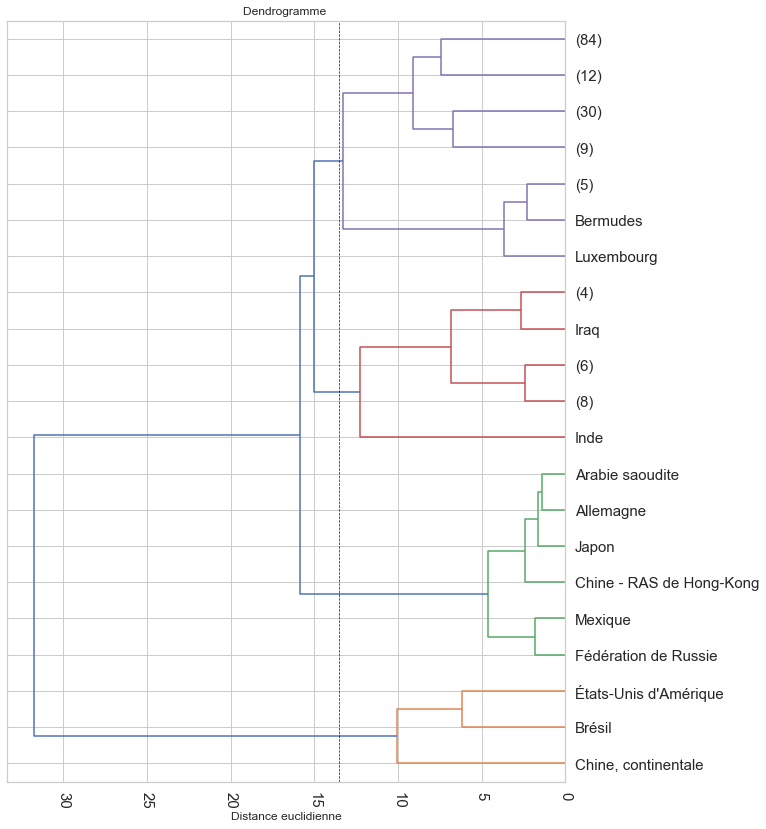

In [130]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
...
plt.figure(figsize=(10,14))
labelsize=20
ticksize=15
plt.title('Dendrogramme ')
plt.xlabel('Distance euclidienne')
link_matrix=linkage(data, 'ward')
dist_threshold=13.5
dendrogram(link_matrix, truncate_mode='level', p=5, color_threshold=dist_threshold,
          labels=data.index, orientation='left')
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)

plt.axvline(dist_threshold, c='k', ls='--', lw=.7);

##### Observation : 
* Le dendogramme indique qu'il a trouvé, selon le découpage que je lui ai donné, 4 clusters. 
    * Dans le premier groupe, on trouve 3 pays
    * Dans le deuxième groupe, on trouve 6 pays
    * Dans le troisième, on trouve 20 pays
    * Dans le quatrième, on trouve 142 pays

Le modèle en 4 clusters, ce qui me semble le plus pertinent.

Nous effectuerons la comparaison plus tard avec la méthode sklearn pour déterminer le nombre final de clusters.

In [131]:
# Importer l'algorithme de clustering hiérarchique
from sklearn.cluster import AgglomerativeClustering
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Créer un modèle de clustering hiérarchique
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True) 

# Ajustez les données au modèle et déterminez à quels clusters appartient chaque point de données 
hiercluster.set_params(n_clusters=4)
clusters = hiercluster.fit_predict(X_scaled) 
np.bincount(clusters) # nombre de points de données dans chaque cluster



array([130,  23,   6,   7], dtype=int64)

In [60]:
# Ajoutez le numéro de cluster aux données originales mises à l'échelle.
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters
X_clustered

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique,cluster
Pays,,,,,,,,
Afghanistan,-0.665693,-0.435509,-0.154833,-0.498773,0.508900,0.312074,-4.925220,0
Afrique du Sud,-0.392878,2.610957,1.713097,2.346715,-2.083554,0.833771,0.134326,1
Albanie,-0.471181,-0.488199,-0.294321,-0.514266,0.481915,-0.529445,0.134326,0
Algérie,-0.490883,-0.090626,-0.427745,-0.047764,-0.082835,0.440349,0.134326,0
Allemagne,1.483765,1.949931,4.333051,1.964563,-0.822985,1.479762,0.134326,2
...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),-0.280346,1.351176,1.246115,1.031559,-0.759379,0.138449,0.134326,0
Viet Nam,-0.575835,1.253779,2.586415,0.546122,0.210141,1.780541,0.658351,2
Yémen,-0.654760,-0.136930,0.215114,-0.280154,0.381686,0.098966,0.134326,0


In [61]:
# Composition des clusters CAH

# Affichage du nombre de pays par cluster

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 0 :".format(f =len(X_clustered[X_clustered["cluster"]==0]))+"\033[0;0m","\n")
print(X_clustered[X_clustered["cluster"]==0].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 1 :".format(f =len(X_clustered[X_clustered["cluster"]==1]))+"\033[0;0m","\n")
print(X_clustered[X_clustered["cluster"]==1].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 2 :".format(f =len(X_clustered[X_clustered["cluster"]==2]))+"\033[0;0m","\n")
print(X_clustered[X_clustered["cluster"]==2].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 3 :".format(f =len(X_clustered[X_clustered["cluster"]==3]))+"\033[0;0m","\n")
print(X_clustered[X_clustered["cluster"]==3].index.tolist(),"\n")




Les 130 pays du cluster 0 : 

['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Antigua-et-Barbuda', 'Arménie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Brunéi Darussalam', 'Bulgarie', 'Burkina Faso', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Chili', 'Chypre', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba', 'Danemark', 'Djibouti', 'Dominique', 'El Salvador', 'Émirats arabes unis', 'Équateur', 'Estonie', 'Eswatini', 'Fidji', 'Finlande', 'Gabon', 'Gambie', 'Géorgie', 'Ghana', 'Grèce', 'Grenade', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana', 'Haïti', 'Honduras', 'Hongrie', 'Îles Salomon', 'Iraq', 'Israël', 'Jamaïque', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Kiribati', 'Koweït', 'Lesotho', 'Lettonie', 'Liban', 'Libéria', 'Lituanie', 'Macédoine du Nord', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Malte', 'Maroc', 'Maurice', 'Mauritanie', 'Mongolie

* Nous voyons ici quels sont les pays qui composent chaque cluster avec CAH. 

    * Nous constatons que le cluster 0 contient 130 pays.
    * le cluster 1 ccontient 23 pays.
    * le cluster 2 contient 6 pays.
    * et le cluster 3 contient 7 pays.

### 4. K-MEANS  

In [62]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters2 =  model_kmeans.fit_predict(X_scaled)

# Add the cluster number to the original scaled data
X_clustered2 = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered2["cluster"] = clusters2

X_clustered2.head()

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique,cluster
Pays,,,,,,,,
Afghanistan,-0.665693,-0.435509,-0.154833,-0.498773,0.508900,0.312074,-4.925220,0
Afrique du Sud,-0.392878,2.610957,1.713097,2.346715,-2.083554,0.833771,0.134326,1
Albanie,-0.471181,-0.488199,-0.294321,-0.514266,0.481915,-0.529445,0.134326,0
Algérie,-0.490883,-0.090626,-0.427745,-0.047764,-0.082835,0.440349,0.134326,0
Allemagne,1.483765,1.949931,4.333051,1.964563,-0.822985,1.479762,0.134326,2


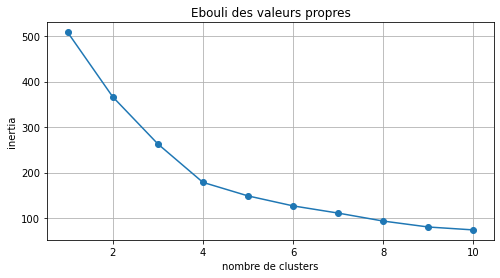

In [63]:
# Recherche et vérification du nombre de clusters METHODE DU COUDE

from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=5)
inertia=[]
fig = plt.figure(figsize=(8,4))
for i in range (1,11):
    Kmeans = KMeans(n_clusters = i, max_iter = 300)
    Kmeans.fit(X)
    inertia.append(Kmeans.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.title('Ebouli des valeurs propres')
plt.xlabel('nombre de clusters')
plt.ylabel('inertia')
plt.grid()
plt.show()

* MÉTHODE DU COUDE

    * La méthode du coude nous dit que 4 est optimal pour éviter un coude trop prononcé.

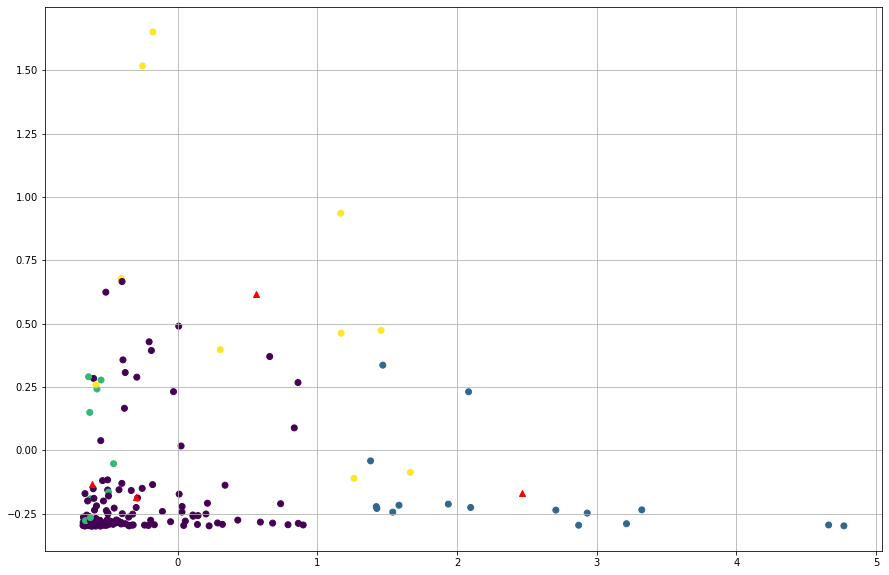

Inertie totale : 178.43901942871398


In [64]:
# Affichage des clusters et centoîdes

fig = plt.figure(figsize=(15,10))
model = KMeans(n_clusters=4)
model.fit(X)
model.predict(X)
centroids = model.cluster_centers_
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='^',c='r')
plt.grid()
plt.show()
print('Inertie totale :',model.inertia_)

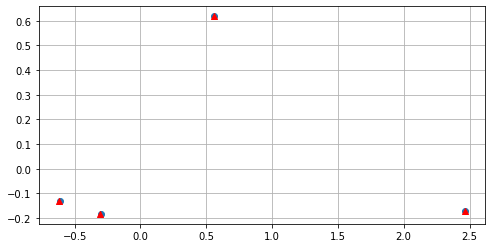

Inertie totale : 178.32186957630628


In [65]:
# Affichage des centoîdes
fig = plt.figure(figsize=(8,4))
model = KMeans(n_clusters=4)
model.fit(X)
model.predict(X)
plt.scatter(centroids[:,0],centroids[:,1])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='^',c='r')
plt.grid()
plt.show()
print('Inertie totale :',model.inertia_)

* Ici, on peut voir où sont situés les clusters et les centroïdes.

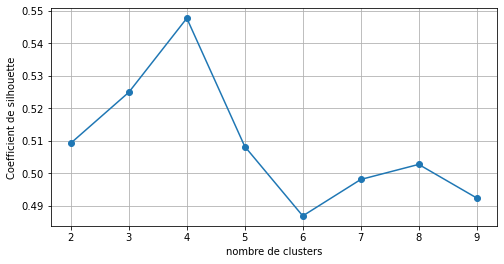

[0.5092187080532632,
 0.5248579666929665,
 0.5476269637599168,
 0.5081706037997674,
 0.4868192443688599,
 0.49802991230886384,
 0.5026672620701784,
 0.4923372233014951]

In [66]:
#Coefficient de silhouette

from sklearn.metrics import silhouette_score
tab_silhouette =[]
k_range=range(2,10)
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(X)
    tab_silhouette.append(silhouette_score(X,cluster_labels))

fig = plt.figure(figsize=(8,4))
#plt.plot(range(1,11), inertia, marker='o')
plt.plot(k_range,tab_silhouette, marker='o')
#plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()
tab_silhouette

* Pour le coefficient de silhouette, nous affichons l'évolution en fonction du nombre de clusters et son maximum est de 4. 

In [96]:
# Composition des clusters K-MEANS

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 0 :".format(f =len(X_clustered2[X_clustered2["cluster"]==0]))+"\033[0;0m","\n")
print(X_clustered2[X_clustered2["cluster"]==0].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 1 :".format(f =len(X_clustered2[X_clustered2["cluster"]==1]))+"\033[0;0m","\n")
print(X_clustered2[X_clustered2["cluster"]==1].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 2 :".format(f =len(X_clustered2[X_clustered2["cluster"]==2]))+"\033[0;0m","\n")
print(X_clustered2[X_clustered2["cluster"]==2].index.tolist(),"\n")

print("="*150,"\n")
print("\033[1m"+"Les {f} pays du cluster 3 :".format(f =len(X_clustered2[X_clustered2["cluster"]==3]))+"\033[0;0m","\n")
print(X_clustered2[X_clustered2["cluster"]==3].index.tolist(),"\n")




Les 119 pays du cluster 0 : 

['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Antigua-et-Barbuda', 'Arménie', 'Azerbaïdjan', 'Barbade', 'Bélarus', 'Belize', 'Bénin', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Brunéi Darussalam', 'Bulgarie', 'Burkina Faso', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Chili', 'Chypre', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba', 'Djibouti', 'Dominique', 'El Salvador', 'Équateur', 'Estonie', 'Eswatini', 'Éthiopie', 'Fidji', 'Gabon', 'Gambie', 'Géorgie', 'Ghana', 'Grèce', 'Grenade', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana', 'Haïti', 'Honduras', 'Hongrie', 'Îles Salomon', 'Iraq', 'Jamaïque', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Kiribati', 'Koweït', 'Lesotho', 'Lettonie', 'Liban', 'Libéria', 'Lituanie', 'Macédoine du Nord', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Malte', 'Maroc', 'Maurice', 'Mauritanie', 'Mongolie', 'Monténégro', 'Mozambique', 'Namibie', 'Népal', 'Nicaragua', 'Niger', 'Nouvel

* Nous voyons ici quels sont les pays qui composent chaque cluster avec la méthode Kmeans. 

    * Nous constatons que le cluster 0 contient 119 pays.
    * le cluster 1 ccontient 25 pays.
    * le cluster 2 contient 5 pays.
    * et le cluster 3 contient 17 pays.

In [68]:
#Comparaison des deux méthodes

cah2 = pd.pivot_table(X_clustered, index="cluster", aggfunc="count").reset_index()
cah2.rename(columns={"Importations":"Nombre_pays (CAH)"}, inplace= True)
kmeans2 = pd.pivot_table(X_clustered2, index="cluster", aggfunc="count").reset_index()
kmeans2.rename(columns={"Importations":"Nombre_pays (Kmeans)"},inplace= True)
pays_x_clusters = cah2[["cluster", "Nombre_pays (CAH)"]].merge(kmeans2[["cluster", "Nombre_pays (Kmeans)"]], on="cluster").set_index("cluster")
pays_x_clusters 

,Nombre_pays (CAH),Nombre_pays (Kmeans)
cluster,,
0,130,119
1,23,25
2,6,5
3,7,17


* Nous avons ici opposé les deux méthodes pour mettre en évidence leurs différences.

In [69]:
X_clustered2

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique,cluster
Pays,,,,,,,,
Afghanistan,-0.665693,-0.435509,-0.154833,-0.498773,0.508900,0.312074,-4.925220,0
Afrique du Sud,-0.392878,2.610957,1.713097,2.346715,-2.083554,0.833771,0.134326,1
Albanie,-0.471181,-0.488199,-0.294321,-0.514266,0.481915,-0.529445,0.134326,0
Algérie,-0.490883,-0.090626,-0.427745,-0.047764,-0.082835,0.440349,0.134326,0
Allemagne,1.483765,1.949931,4.333051,1.964563,-0.822985,1.479762,0.134326,2
...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),-0.280346,1.351176,1.246115,1.031559,-0.759379,0.138449,0.134326,1
Viet Nam,-0.575835,1.253779,2.586415,0.546122,0.210141,1.780541,0.658351,1
Yémen,-0.654760,-0.136930,0.215114,-0.280154,0.381686,0.098966,0.134326,0


In [70]:
# Afficher les moyennes des variables de chaque groupe

groupe=(0,1,2,3)
for n in groupe:
    affi=X_clustered2.loc[X_clustered2['cluster']==n].mean()
    print(affi)

PIB                        -0.355506
Disponibilité intérieure   -0.402341
Importations               -0.256862
Production                 -0.420326
volailles                   0.389153
Population                 -0.318297
Stabilité politique         0.004801
cluster                     0.000000
dtype: float64
PIB                        -0.021888
Disponibilité intérieure    1.393329
Importations                0.211476
Production                  1.600175
volailles                  -1.724889
Population                  1.425441
Stabilité politique        -0.308746
cluster                     1.000000
dtype: float64
PIB                         0.519116
Disponibilité intérieure    3.637941
Importations                4.529547
Production                  2.826300
volailles                  -1.725429
Population                  1.984884
Stabilité politique         0.134326
cluster                     2.000000
dtype: float64
PIB                         2.368052
Disponibilité intérieure   -0.

#### 4.1 LES 4 CLUSTERS

In [71]:
# Cluster 0
cluster_0=X_clustered2.loc[X_clustered2['cluster']==0]
cluster_0.head()

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique,cluster
Pays,,,,,,,,
Afghanistan,-0.665693,-0.435509,-0.154833,-0.498773,0.508900,0.312074,-4.925220,0
Albanie,-0.471181,-0.488199,-0.294321,-0.514266,0.481915,-0.529445,0.134326,0
Algérie,-0.490883,-0.090626,-0.427745,-0.047764,-0.082835,0.440349,0.134326,0
Angola,-0.491559,0.038705,1.628191,-0.491887,1.067867,0.148884,-0.461977,0
Antigua-et-Barbuda,0.058216,-0.544083,-0.409550,-0.543530,0.478060,-0.599683,0.134326,0


,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique,cluster
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.0
mean,-0.355506,-0.402341,-0.256862,-0.420326,0.389153,-0.318297,0.004801,0.0
std,0.365692,0.200879,0.369120,0.203510,0.246819,0.372936,0.963838,0.0
min,-0.669089,-0.552067,-0.445939,-0.543530,-0.844187,-0.600776,-4.925220,0.0
25%,-0.622556,-0.524923,-0.433809,-0.533201,0.352774,-0.561635,0.134326,0.0
50%,-0.490883,-0.480216,-0.385292,-0.495330,0.441438,-0.446191,0.134326,0.0
75%,-0.258365,-0.380423,-0.294321,-0.392046,0.478060,-0.189099,0.134326,0.0
max,0.921188,0.540063,2.058786,0.633914,1.092925,2.077720,2.266563,0.0


In [72]:
# Cluster 1
cluster_1=X_clustered2.loc[X_clustered2['cluster']==1]
cluster_1.head()

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique,cluster
Pays,,,,,,,,
Afrique du Sud,-0.392878,2.610957,1.713097,2.346715,-2.083554,0.833771,0.134326,1
Argentine,0.022438,2.002622,-0.421680,2.842481,-3.317137,0.504522,0.134326,1
Australie,2.115826,1.164365,-0.342839,1.346577,-1.617105,0.017106,0.134326,1
Bangladesh,-0.616129,-0.203990,-0.445939,-0.164820,0.042451,3.419777,-2.142469,1
Canada,1.496181,1.504457,0.924685,1.615117,-1.514949,0.323054,2.122005,1


In [73]:
# Cluster 2
cluster_2=X_clustered2.loc[X_clustered2['cluster']==2]
cluster_2.head(50)

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique,cluster
Pays,,,,,,,,
Allemagne,1.483765,1.949931,4.333051,1.964563,-0.822985,1.479762,0.134326,2
Arabie saoudite,0.322156,1.702446,4.884939,0.435952,1.064012,0.231605,0.134326,2
Fédération de Russie,-0.164196,5.762803,2.768356,5.407380,-5.175223,3.063258,0.134326,2
Japon,1.192531,3.446021,5.958392,1.968005,-0.310277,2.609218,0.134326,2
Mexique,-0.238676,5.328506,4.702998,4.355599,-3.382672,2.540576,0.134326,2


In [74]:
# Cluster 3
cluster_3=X_clustered2.loc[X_clustered2['cluster']==3]
cluster_3.head()

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique,cluster
Pays,,,,,,,,
Autriche,1.613188,-0.285421,0.190856,-0.318025,0.416381,-0.379947,0.134326,3
Bahamas,0.885864,-0.516940,-0.330709,-0.531480,0.489625,-0.592471,1.923237,3
Belgique,1.453279,-0.326935,1.082368,0.126098,0.202431,-0.314467,0.134326,3
Bermudes,4.826471,-0.548873,-0.421680,-0.543530,0.474205,-0.600498,0.134326,3
Chine - RAS de Macao,3.256284,-0.521730,-0.342839,-0.536644,0.491552,-0.586406,0.134326,3


In [75]:
X_clustered2.describe()

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique,cluster
count,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,166.000000
mean,-1.672023e-17,-7.691304e-18,1.337618e-18,2.140189e-17,4.280378e-17,-1.004886e-16,9.764612e-17,0.518072
std,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,0.964352
min,-6.690885e-01,-5.520666e-01,-4.459387e-01,-5.435295e-01,-5.175223e+00,-6.007755e-01,-4.925220e+00,0.000000
25%,-5.944977e-01,-5.181371e-01,-4.338093e-01,-5.280369e-01,1.561719e-01,-5.464934e-01,1.343262e-01,0.000000
50%,-4.051874e-01,-4.363073e-01,-3.610328e-01,-4.617626e-01,4.134898e-01,-3.715160e-01,1.343262e-01,0.000000
75%,1.109890e-01,-8.823101e-02,-8.508858e-02,-9.768475e-02,4.742052e-01,1.143459e-01,1.343262e-01,1.000000
max,4.826471e+00,5.762803e+00,5.958392e+00,5.407380e+00,1.102562e+00,6.063457e+00,2.537610e+00,3.000000


<AxesSubplot:xlabel='cluster', ylabel='Production'>

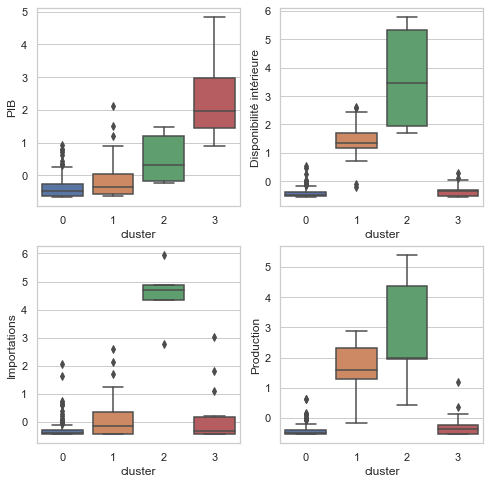

In [76]:
# Représentation de la distribution des variables par groupe en utilisant une boite à moustache


# Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=X_clustered2, x='cluster', y='PIB')
plt.subplot(222)
sns.boxplot(data=X_clustered2, x='cluster', y='Disponibilité intérieure')
plt.subplot(223)
sns.boxplot(data=X_clustered2, x='cluster', y='Importations')
plt.subplot(224)
sns.boxplot(data=X_clustered2, x='cluster', y='Production')


<AxesSubplot:xlabel='cluster', ylabel='Stabilité politique'>

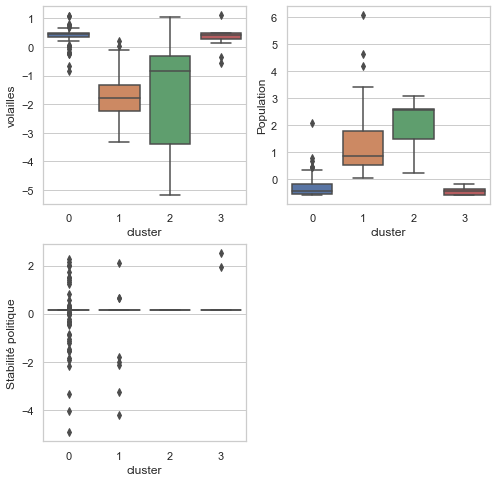

In [77]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=X_clustered2, x='cluster', y='volailles')
plt.subplot(222)
sns.boxplot(data=X_clustered2, x='cluster', y='Population')
plt.subplot(223)
sns.boxplot(data=X_clustered2, x='cluster', y='Stabilité politique')


##### CARACTIRISTIQUES DE CHAQUE GROUPE

* GROUPE 0 Ce groupe inclus essentiellement des pays avec :

    * Un PIB le plus faible
    * Une disponibilité int. le plus faible
    * L'importation les plus faibles
    * Un production la faible
    * Volailles la plus élevés,
    * Population la plus faible 
    * Stabilité politique dans la moyenne

* GROUPE 1 Ce groupe inclus essentiellement des pays avec :

    * Un PIB dans les plus bas
    * Un disponibilité dans les plus hauts
    * L'importation dans les plus hautes
    * Un production ans les plus hautess
    * Volaille dans les plus basses
    * Population dans les plus hautes
    * Stabilité politique dans la moyenne

* GROUPE 2 Ce groupe inclus essentiellement des pays avec :

    * Un PIB le plus élevé
    * Une disponibilité int  le plus élevé
    * L'importation les plus élevées
    * Un production la plus élevée 
    * Volailles le plus élevée 
    * Population la plus élevée 
    * Stabilité politique dans la moyenne

* GROUPE 3 Ce groupe inclus essentiellement des pays avec :

    * Un PIB le plus élevé, 
    * Une dispo int parmi les plus faibles
    * L'importation les importations dans les plus basses
    * Un production dans les plus basses
    * Volailles dans les plus basses
    * Population la plus faible
    * Stabilité politique dans la moyenne

OBSERVATIONS Deux groupes présente des caractéristiques intéressantes pour notre objectif d'exportation :

* Les groupes 1 et 2 présentent des combinaisons favorables, avec un PIB élevé, une population élevée 

Text(0.5, 1.0, 'CLUSTER')

<Figure size 504x504 with 0 Axes>

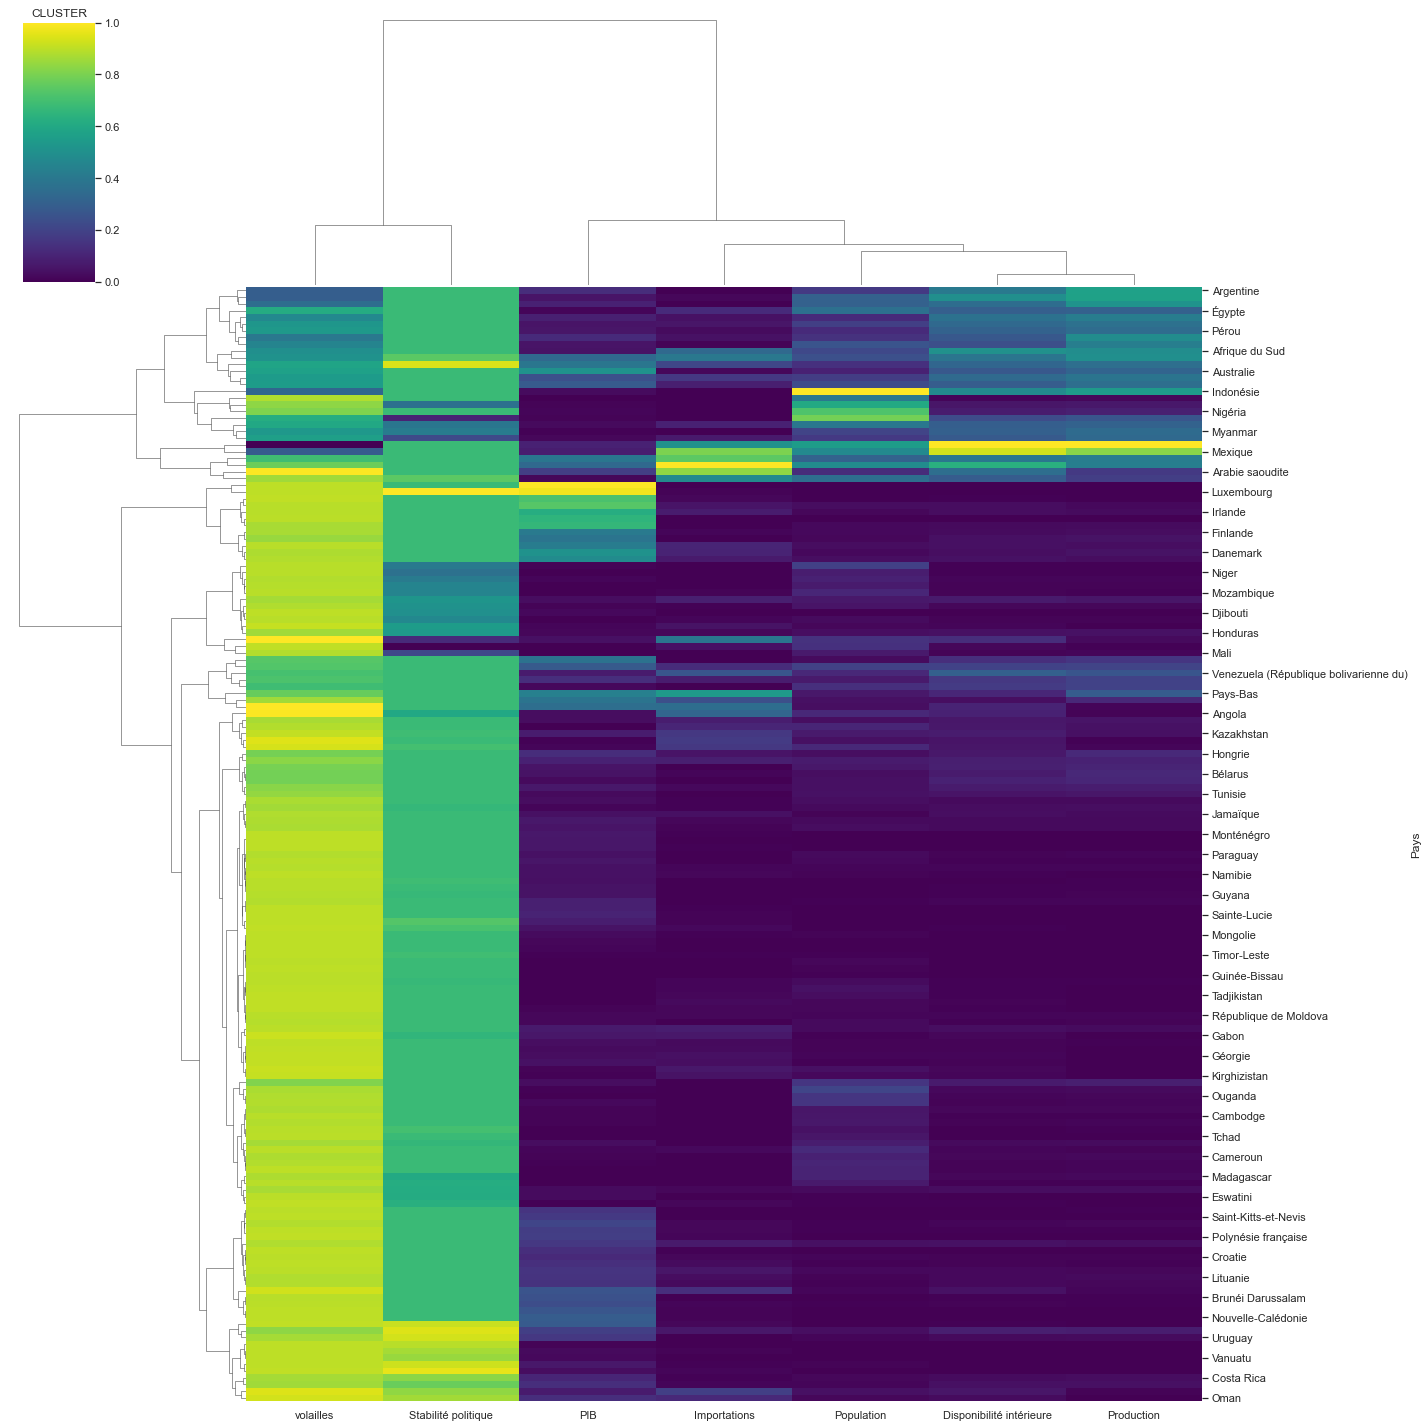

In [78]:
# CROISEMENT ENTRE LES DIFFERENTS CLUSTERS DE PAYS AVEC LES DIFFERENTES VARIABLES

#heatmap avec les croisements entre les clusters de pays et les différentes variables
plt.figure(figsize=(7, 7))
sns.clustermap(X, cmap = 'viridis',method = 'ward',metric = 'euclidean',standard_scale =1,figsize = (20, 20))
plt.title('CLUSTER')


* On voit de manière générale, la corrélation entre les variables et les pays. Où le plus clair représente une meilleure corrélation et le plus foncé une corrélation moins intéressante.

##### CORRÉLATIONS ENTRE LES VARIABLES DANS CHAQUE GROUPE

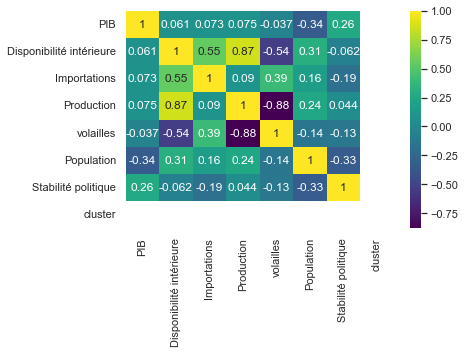

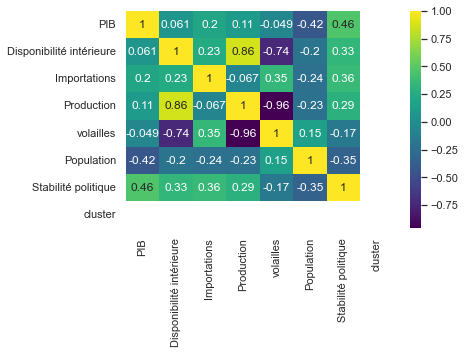

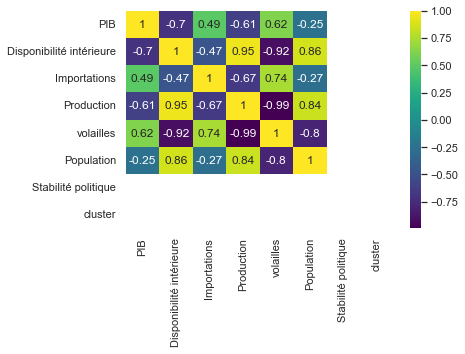

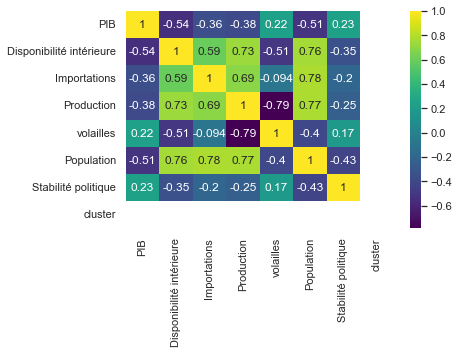

In [79]:
# heatmap de corrélations entre les différentes variables dans chaque cluster
groupe=(cluster_0,cluster_1,cluster_2,cluster_3)
for n in groupe:
    #df_norm_col=(n-n.mean())/n.std()
    sns.heatmap(n.corr(),annot = True,cmap='viridis') #sns.clustermap(tz, cmap = 'viridis', method = 'ward',metric = 'euclidean')  
   
    plt.show()

OBSERVATIONS La heatmap du cluster numéro 2 confirme bien notre choix


### 5. Analys en composantes principales (ACP)


In [80]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing 
#from functions import *   
#Centrage / réduction des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
#Calcul des composantes principales
pca = decomposition.PCA(svd_solver='full')
pca.fit(X_scaled)

PCA(svd_solver='full')

In [81]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(pca.explained_variance_ratio_.cumsum())

[0.52434136 0.71964185 0.83952561 0.93885781 0.99640792 0.99999725
 1.        ]


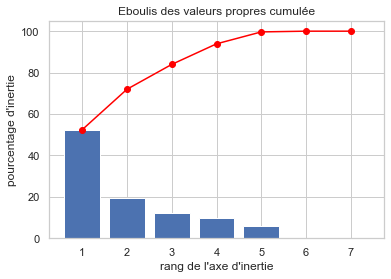

In [82]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
import sklearn
X = sklearn.preprocessing.StandardScaler().fit_transform(X)

#Représentation de la variance expliquée 
pca = decomposition.PCA()
pca.fit(X_scaled)
scree = pca.explained_variance_ratio_*100

plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres cumulée")
plt.show()




OBSERVATIONS
Nous avons dans notre cas l'inertie totale répartie inéquitablement sur 5 axes

* Axe 1 : 52.4 % de l'inertie totale
* Axe 2 : 19.5 % de l'inertie totale
* Axe 3 : 12. % de l'inertie totale
* Axe 4 : 10 % de l'inertie totale

#### 5.1 CERCLES DES CORRÉLATIONS

In [83]:
# Calcul des composantes principales
n_comp = 4
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

In [84]:
# Fonction qui me permet d'afficher mes cercles de corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="r", width= 0.003)
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="black", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='silver', ls='--')
            plt.plot([0, 0], [-1, 1], color='silver', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

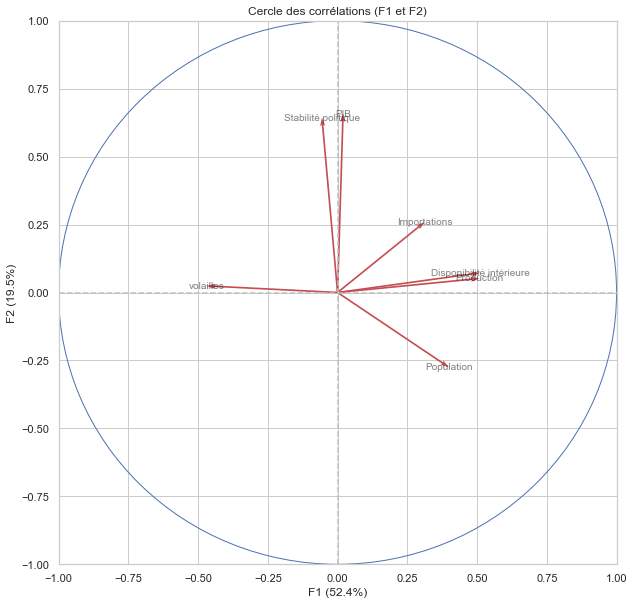

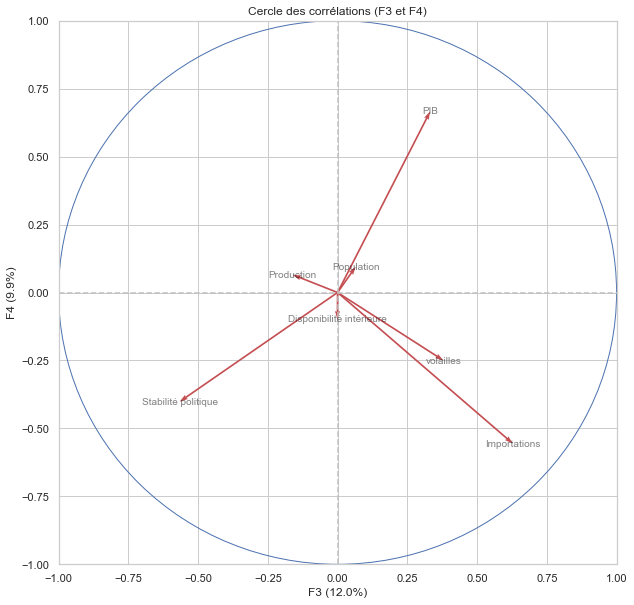

In [132]:
# choix du nombre de composantes à calculer
n_comp = 4
# selection des colonnes à prendre en compte dans l'ACP
features = data.columns
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features) )
plt.show()

In [90]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = X_clustered2[['PIB', 'Disponibilité intérieure',
       'Importations', 'Production',
       'volailles', 'Population',
        'Stabilité politique',
        'cluster']]


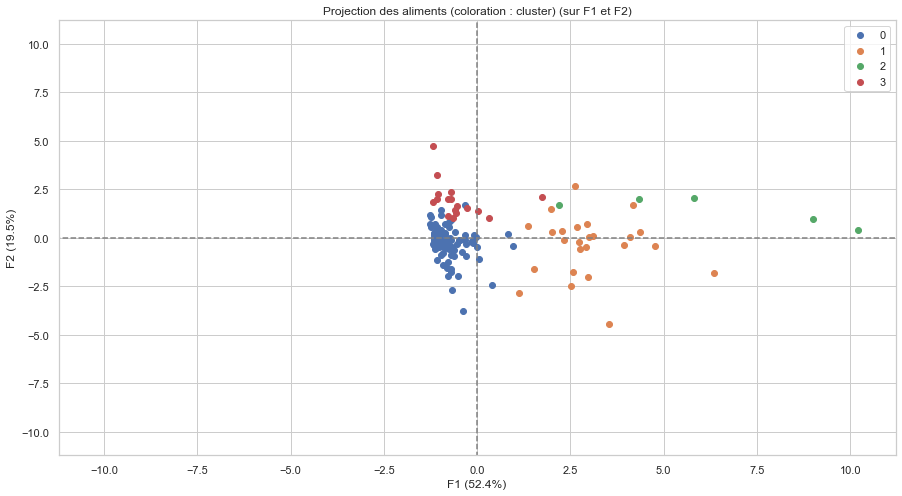

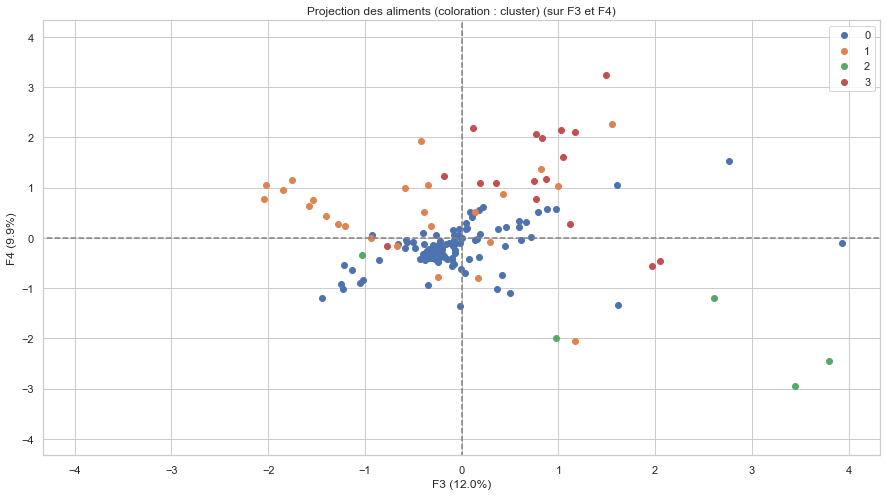

In [134]:
from sklearn import decomposition
from sklearn import preprocessing

# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var=data_pca[['cluster']].values[:,0], illustrative_legend='cluster')


* À haute, le résultat du k-means APRÈS avoir projeté les données sur le premier plan factoriel. En bas, application du k-means, PUIS projection sur le premier plan factoriel : le résultat du clustering est visuellement moins intuitif.

* Dans notre premier cercle de corrélation on va dire que l'axe F1 explique le 52.4% de la variance de jeu de données initial, pendant que le F2 explique le 19.5% de la variance de jeu  de données initial.

* L'axe des abscisses répresent la corrélation entre la variable initial et les premier composant

  #### 5.2 CORRÉLATIONS DES VARIABLES AVEC LES COMPOSANTES PRINCIPALES

In [86]:
# création de la matrice de corrélation
t=pca.components_[0:9]
df_corr_comp = pd.DataFrame(t,index = ['F1', 'F2', 'F3','F4'],columns=["PIB","Disponibilité intérieure", "Importations", "Production", "volailles", "Population", "Stabilité politique"])
df_corr_comp.head()

,PIB,Disponibilité intérieure,Importations,Production,volailles,Population,Stabilité politique
F1,0.019617,0.510658,0.312404,0.508167,-0.469785,0.398981,-0.055948
F2,0.658657,0.072330,0.259425,0.051741,0.024322,-0.275051,0.643985
F3,0.331937,-0.000528,0.628386,-0.160979,0.379811,0.065181,-0.566153
F4,0.666331,-0.099008,-0.555877,0.065407,-0.250109,0.095090,-0.401656


OBSERVATIONS

* F1 : Variables corrélées positivement:

  *  variables corrélées positivement : La variable Disponibilité intérieure (0.51)
  *  variables corrélées négativement :La variable volailles corrélées (-0.46)
* F2 :
  *  variables corrélées positivement : La Stabilité politique est fortement corrélé (0.64)
  *  variables corrélées négativement : La Population est fortement corrélé (-0.27)

* F3 :
  * variables corrélées positivement : La variable Importations est fortement corrélé (0.62)
  * variables corrélées négativement : La Stabilité politique est fortement corrélé (-0.56)

* F4 :
  * variables corrélées positivement : La variable Population est corrélé (0.09)
  * variables corrélées négativement : L'importations est trés fortement corrélé (-0.55)
 

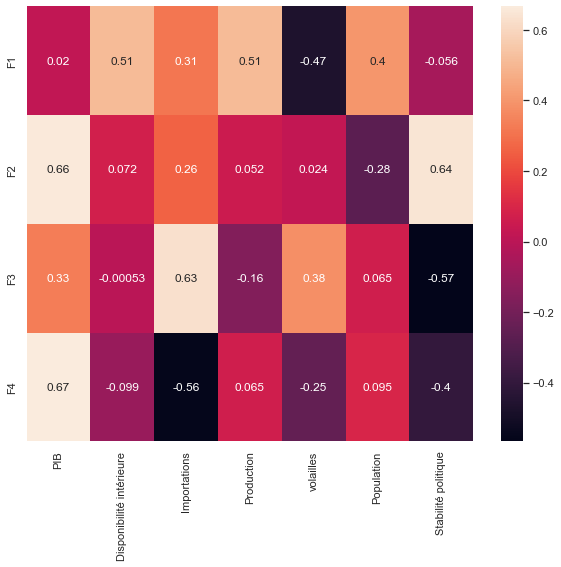

In [87]:
# Heatmap de matrices des corrélations
pcs2 = pd.DataFrame(pcs, columns=['PIB', 'Disponibilité intérieure',
       'Importations', 'Production',
       'volailles','Population','Stabilité politique'])
pcs2.index = ["F1","F2","F3","F4"]
plt.figure(figsize=(10,8))
sns.heatmap(pcs2, annot=True)
plt.show()

F1 : représente le pays avec une stablilité et consomation de volaille faible, la production et le dispo int. sont très fort.

F2 : Le dispo int. et la stabilité politique sont très fort alors que la population est faible.

F3 : Très fort importations et population est fort d'autre part la dispo int. et la production sont très faibles.

F4 : Très fort PIB et population d'autre part la dispo al et le volaille est faible.

F5: Population et stabilité politique fort d'autre part les importations et la production sont faible

